In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activacion en TensorFlow

In [ ]:
session = tf.Session()
tf.set_random_seed(2019)
np.random.seed(2019)

batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_normal(shape=[1,1]))

a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_normal(shape=[1,1]))

x = np.random.normal(loc=5,scale=0.25, size=1000)
x_data = tf.placeholder(shape=[None, 1], dtype= tf.float32)

sigmoid_act = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_act = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

target = 0.75
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_act, target)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_act, target)))

my_optim = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_optim.minimize(loss1)
train_step_relu = my_optim.minimize(loss2)
init = tf.global_variables_initializer()
session.run(init)

loss_vect_sigmoid = []
loss_vect_relu = []
activ_sigmoid = []
activ_relu = []
for i in range(1000):
    rand_idx = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_idx]])
    session.run(train_step_sigmoid, feed_dict = {x_data:x_vals})
    session.run(train_step_relu, feed_dict={x_data:x_vals})
    
    loss_vect_sigmoid.append(session.run(loss1, feed_dict={x_data:x_vals}))
    loss_vect_relu.append(session.run(loss2, feed_dict={x_data:x_vals}))
    
    activ_sigmoid.append(np.mean(session.run(sigmoid_act, feed_dict={x_data:x_vals})))
    activ_relu.append(np.mean(session.run(relu_act, feed_dict={x_data:x_vals})))

plt.plot(activ_sigmoid, 'r-', label="Función de Activación Sigmoide")
plt.plot(activ_relu, 'b--', label="Función de Activación ReLU")
plt.ylim([0.0,2.0])
plt.title("Funciones de Activación")
plt.xlabel("Número de iteración")
plt.ylabel("Predicción del modelo")
plt.legend(loc="lower right")
plt.show()

plt.plot(loss_vect_sigmoid, 'r-', label = "Pérdidas de la Sigmoide")
plt.plot(loss_vect_relu, 'b--', label="Pérdidas de la ReLU")
plt.ylim([0.,1.])
plt.title("Función de pérdidas")
plt.xlabel("Número de iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Configurar las semillas para reproducibilidad
tf.random.set_seed(2019)
np.random.seed(2019)

# Tamaño del lote
batch_size = 50

# Definir variables
a1 = tf.Variable(tf.random.normal(shape=[1, 1]))
b1 = tf.Variable(tf.random.normal(shape=[1, 1]))

a2 = tf.Variable(tf.random.normal(shape=[1, 1]))
b2 = tf.Variable(tf.random.normal(shape=[1, 1]))

# Datos de entrada
x = np.random.normal(loc=5, scale=0.25, size=1000)

# Funciones de activación
def sigmoid_activation(x_data):
    return tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

def relu_activation(x_data):
    return tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

# Objetivo y pérdidas
target = 0.75
loss1 = lambda: tf.reduce_mean(tf.square(sigmoid_activation(x_data) - target))
loss2 = lambda: tf.reduce_mean(tf.square(relu_activation(x_data) - target))

# Optimizadores
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Listas para almacenar las pérdidas y activaciones
loss_vect_sigmoid = []
loss_vect_relu = []
activ_sigmoid = []
activ_relu = []

# Entrenamiento
for i in range(1000):
    rand_idx = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_idx]])

    # Realizar la optimización
    #gradients = tape.gradient(loss, [a])
    gradients = tape.gradient(loss1, [a1, b1])
    #gradients_2 = tape.gradient(loss2, [a2, b2])

    optimizer.apply_gradients(zip(gradients, [a1, b1]))
    #optimizer.apply_gradients(zip(gradients_2, [a2, b2]))

    # Calcular y almacenar pérdidas y activaciones
    loss_vect_sigmoid.append(loss1().numpy())
    loss_vect_relu.append(loss2().numpy())

    activ_sigmoid.append(np.mean(sigmoid_activation(x_vals).numpy()))
    activ_relu.append(np.mean(relu_activation(x_vals).numpy()))

# Graficar resultados
plt.plot(activ_sigmoid, 'r-', label="Función de Activación Sigmoide")
plt.plot(activ_relu, 'b--', label="Función de Activación ReLU")
plt.ylim([0.0, 2.0])
plt.title("Funciones de Activación")
plt.xlabel("Número de iteración")
plt.ylabel("Predicción del modelo")
plt.legend(loc="lower right")
plt.show()

plt.plot(loss_vect_sigmoid, 'r-', label="Pérdidas de la Sigmoide")
plt.plot(loss_vect_relu, 'b--', label="Pérdidas de la ReLU")
plt.ylim([0.0, 1.0])
plt.title("Función de pérdidas")
plt.xlabel("Número de iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()


NameError: name 'tape' is not defined

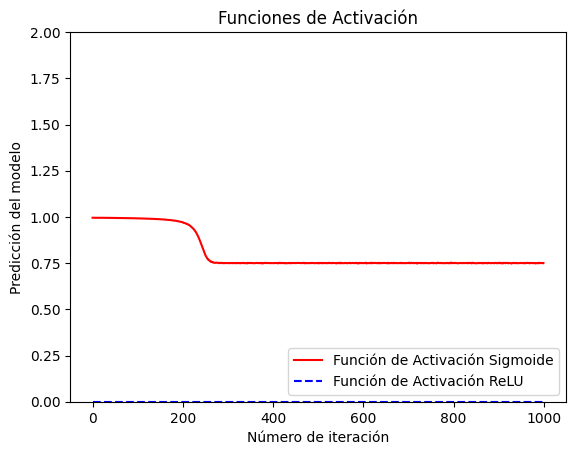

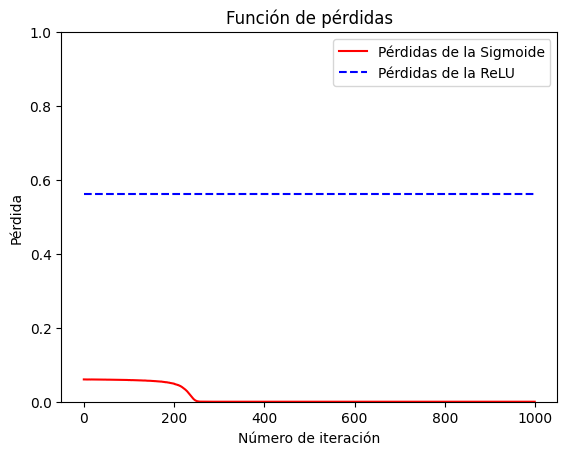

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Configurar las semillas para reproducibilidad
tf.random.set_seed(2019)
np.random.seed(2019)

# Tamaño del lote
batch_size = 50



# Definir variables
a1 = tf.Variable(tf.random.normal(shape=[1, 1]))
b1 = tf.Variable(tf.random.normal(shape=[1, 1]))

a2 = tf.Variable(tf.random.normal(shape=[1, 1]))
b2 = tf.Variable(tf.random.normal(shape=[1, 1]))

# Datos de entrada
x = np.random.normal(loc=5, scale=0.25, size=1000)
x = np.array(x, dtype = "float32")

# Funciones de activación
def sigmoid_activation(x_data):
    return tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

def relu_activation(x_data):
    return tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

# Objetivo
target = 0.75

# Optimizador
optimizer1 = tf.optimizers.SGD(learning_rate=0.08)
optimizer2 = tf.optimizers.SGD(learning_rate=0.1)

# Listas para almacenar las pérdidas y activaciones
loss_vect_sigmoid = []
loss_vect_relu = []
activ_sigmoid = []
activ_relu = []

# Entrenamiento
for i in range(1000):
    rand_idx = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_idx]])

    # Calcular y almacenar pérdidas y activaciones usando GradientTape
    with tf.GradientTape() as tape1:
        sigmoid_output = sigmoid_activation(x_vals)
        loss1 = tf.reduce_mean(tf.square(sigmoid_output - target))

    gradients1 = tape1.gradient(loss1, [a1, b1])
    optimizer1.apply_gradients(zip(gradients1, [a1, b1]))
    loss_vect_sigmoid.append(loss1.numpy())
    activ_sigmoid.append(np.mean(sigmoid_output.numpy()))

    with tf.GradientTape() as tape2:
        relu_output = relu_activation(x_vals)
        loss2 = tf.reduce_mean(tf.square(relu_output - target))

    gradients2 = tape2.gradient(loss2, [a2, b2])
    optimizer2.apply_gradients(zip(gradients2, [a2, b2]))
    loss_vect_relu.append(loss2.numpy())
    activ_relu.append(np.mean(relu_output.numpy()))

# Graficar resultados
plt.plot(activ_sigmoid, 'r-', label="Función de Activación Sigmoide")
plt.plot(activ_relu, 'b--', label="Función de Activación ReLU")
plt.ylim([0.0, 2.0])
plt.title("Funciones de Activación")
plt.xlabel("Número de iteración")
plt.ylabel("Predicción del modelo")
plt.legend(loc="lower right")
plt.show()

plt.plot(loss_vect_sigmoid, 'r-', label="Pérdidas de la Sigmoide")
plt.plot(loss_vect_relu, 'b--', label="Pérdidas de la ReLU")
plt.ylim([0.0, 1.0])
plt.title("Función de pérdidas")
plt.xlabel("Número de iteración")
plt.ylabel("Pérdida")
plt.legend(loc="upper right")
plt.show()


In [10]:
loss_vect_sigmoid

[0.060342174,
 0.060256075,
 0.060334865,
 0.060359348,
 0.060273,
 0.060378462,
 0.06015425,
 0.060290016,
 0.060289055,
 0.06015246,
 0.0603212,
 0.060281776,
 0.060411584,
 0.06029665,
 0.060178503,
 0.060366414,
 0.060363393,
 0.060365383,
 0.06025371,
 0.06026344,
 0.060341466,
 0.060271125,
 0.0603076,
 0.060223855,
 0.06024281,
 0.060274445,
 0.060293153,
 0.060290102,
 0.060268827,
 0.060305357,
 0.060354542,
 0.060183104,
 0.060282245,
 0.060329232,
 0.06029514,
 0.06029091,
 0.060350128,
 0.06033208,
 0.06018982,
 0.06028223,
 0.06024134,
 0.06030102,
 0.060290527,
 0.06018015,
 0.060263414,
 0.060292453,
 0.060363855,
 0.06022286,
 0.060178354,
 0.060335908,
 0.060176536,
 0.060187016,
 0.060275868,
 0.060303975,
 0.060296737,
 0.06011975,
 0.060199715,
 0.06031918,
 0.060174078,
 0.060269184,
 0.060259085,
 0.060202967,
 0.060235012,
 0.06014933,
 0.060232967,
 0.060231026,
 0.06024589,
 0.06033283,
 0.06021936,
 0.060147963,
 0.060173646,
 0.060209047,
 0.060182635,
 0.060